# Effects of Big Data on the Healthcare System

In this project, we're going to demonstrate the effects of big data on the healthcare system. We will achieve this by using a dataset to build machine learning models that can help in the diagnosis of heart disease. The models will the be used in a simple web application powered by Python(django backend) and JavaScript(React frontend) that users can access to predict their likelyhood of having heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Import dataset

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

## Explore dataset

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=319795, step=1)

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### How many records do we have?

In [10]:
len(df)

319795

### What is the relationship between heart disease and smoking?

In [11]:
pd.crosstab(df["HeartDisease"], df["Smoking"])

Smoking,No,Yes
HeartDisease,,
No,176551,115871
Yes,11336,16037


### What is the relationship between heart disease and Alcohol drinking?

In [12]:
pd.crosstab(df["HeartDisease"], df["AlcoholDrinking"])

AlcoholDrinking,No,Yes
HeartDisease,,
No,271786,20636
Yes,26232,1141


### What is the relationship between Heart disease and gender?

In [13]:
pd.crosstab(df["HeartDisease"], df["Sex"])

Sex,Female,Male
HeartDisease,,
No,156571,135851
Yes,11234,16139


### What is the relationship between heart disease and stroke? 

In [14]:
pd.crosstab(df["HeartDisease"], df["Stroke"])

Stroke,No,Yes
HeartDisease,,
No,284742,7680
Yes,22984,4389


### What is the relationship between heart disease and mental health?

In [15]:
pd.crosstab(df["HeartDisease"], df["MentalHealth"])

MentalHealth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
HeartDisease,,,,,,,,,,,,,,,,,,,,,
No,187186,8678,15454,9808,5056,13267,1398,5210,1023,184,...,310,89,63,59,1756,55,117,459,278,15086
Yes,18215,613,1041,658,323,882,112,318,71,19,...,42,9,5,8,198,4,9,56,39,2287


### What is the relationship between heart disease and age category?

In [16]:
pd.crosstab(df["HeartDisease"], df["AgeCategory"])

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
HeartDisease,,,,,,,,,,,,,
No,20934,16822,18527,20254,20520,21047,23999,27555,30359,30050,26218,17433,18704
Yes,130,133,226,296,486,744,1383,2202,3327,4101,4847,4049,5449


### What is the relationship between heart disease and sleep time?

In [17]:
pd.crosstab(df["HeartDisease"], df["SleepTime"])

SleepTime,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
HeartDisease,,,,,,,,,,,,,,,,,,,,,
No,491,660,1645,6570,17154,61294,91426,89244,14345,6631,...,165,202,19,81,2,48,2,6,3,24
Yes,60,128,347,1180,2030,5427,6325,8358,1696,1165,...,24,34,2,21,1,16,0,3,0,6


<Axes: >

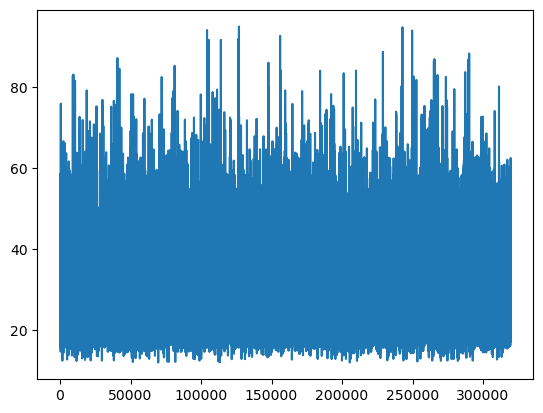

In [18]:
df["BMI"].plot()

<Axes: >

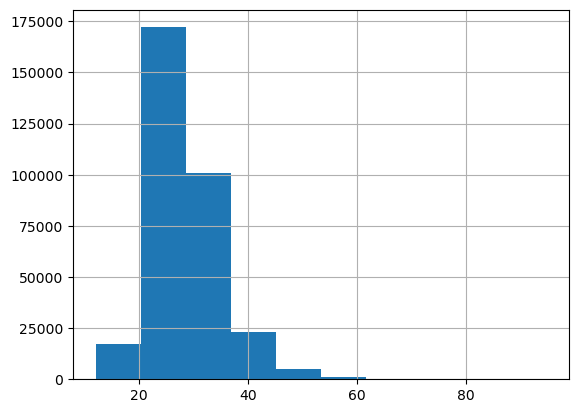

In [19]:
df["BMI"].hist()

<Axes: >

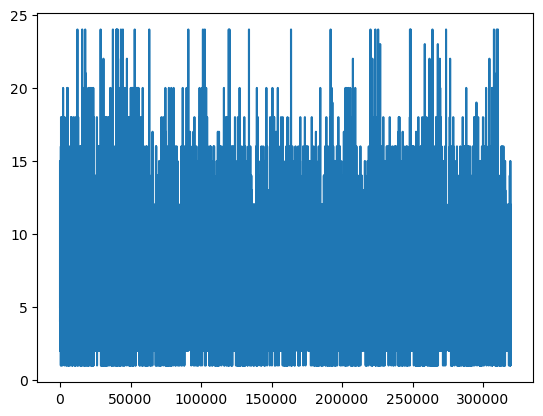

In [20]:
df["SleepTime"].plot()

<Axes: >

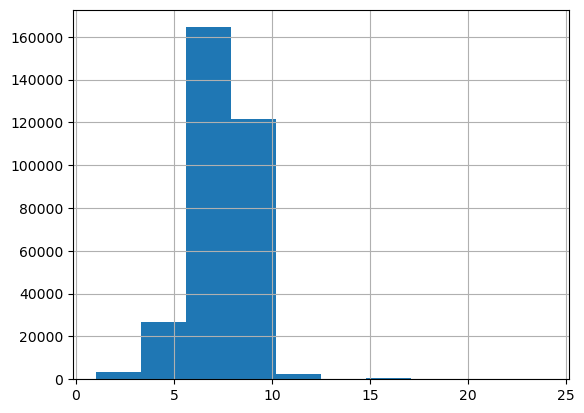

In [21]:
df["SleepTime"].hist()

<Axes: >

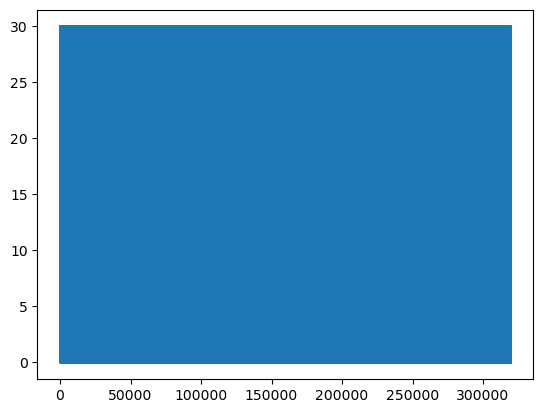

In [22]:
df["MentalHealth"].plot()

<Axes: >

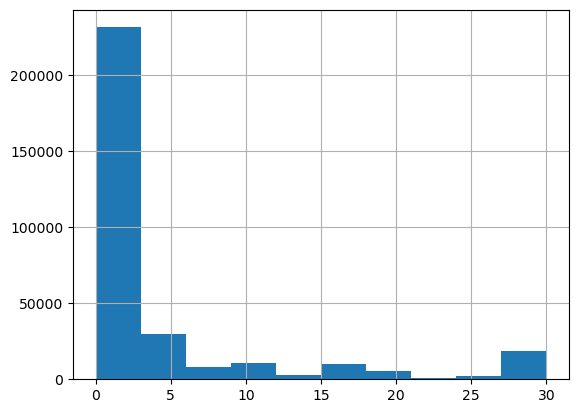

In [23]:
df["MentalHealth"].hist()

<Axes: >

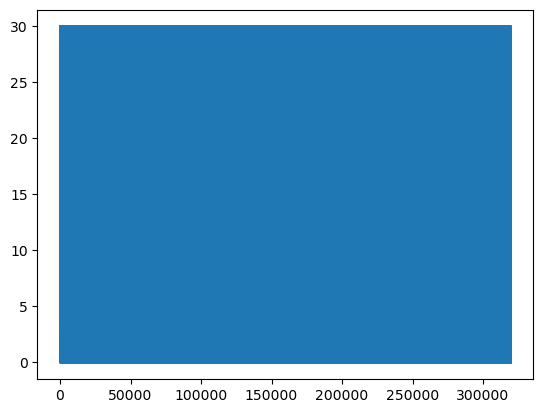

In [24]:
df["PhysicalHealth"].plot()

<Axes: >

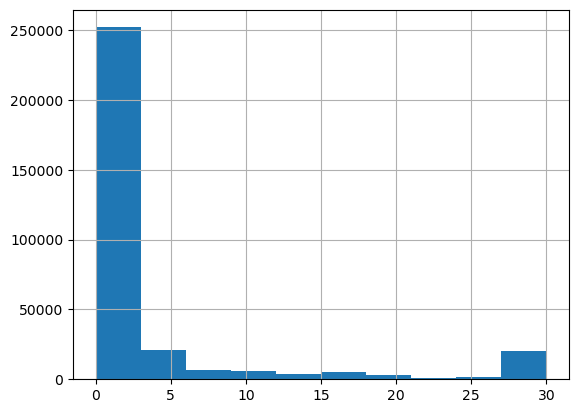

In [25]:
df["PhysicalHealth"].hist()

In [26]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Convert Binary Data to numbers

In [27]:
df["Smoking"] = df["Smoking"].replace({"Yes":1, "No":0})
df["Stroke"] = df["Stroke"].replace({"Yes":1, "No":0})
df["AlcoholDrinking"] = df["Stroke"].replace({"Yes":1, "No":0})
df["Diabetic"] = df["Diabetic"].replace({"Yes":1, "No":0})
df["Asthma"] = df["Asthma"].replace({"Yes":1, "No":0})
df["KidneyDisease"] = df["KidneyDisease"].replace({"Yes":1, "No":0})
df["Sex"] = df["Sex"].replace({"Male":1, "Female":0})
df["PhysicalActivity"] = df["Stroke"].replace({"Yes":1, "No":0})
df["HeartDisease"] = df["Stroke"].replace({"Yes":1, "No":0})
df["SkinCancer"] = df["SkinCancer"].replace({"Yes":1, "No":0})
df["DiffWalking"] = df["DiffWalking"].replace({"Yes":1, "No":0})

/tmp/ipykernel_6879/2048385832.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Smoking"] = df["Smoking"].replace({"Yes":1, "No":0})
/tmp/ipykernel_6879/2048385832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Stroke"] = df["Stroke"].replace({"Yes":1, "No":0})
/tmp/ipykernel_6879/2048385832.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

In [28]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,0,Very good,5.0,1,0,1
1,1,20.34,0,1,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,0,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,0,Very good,8.0,0,0,0


## Data Visualization

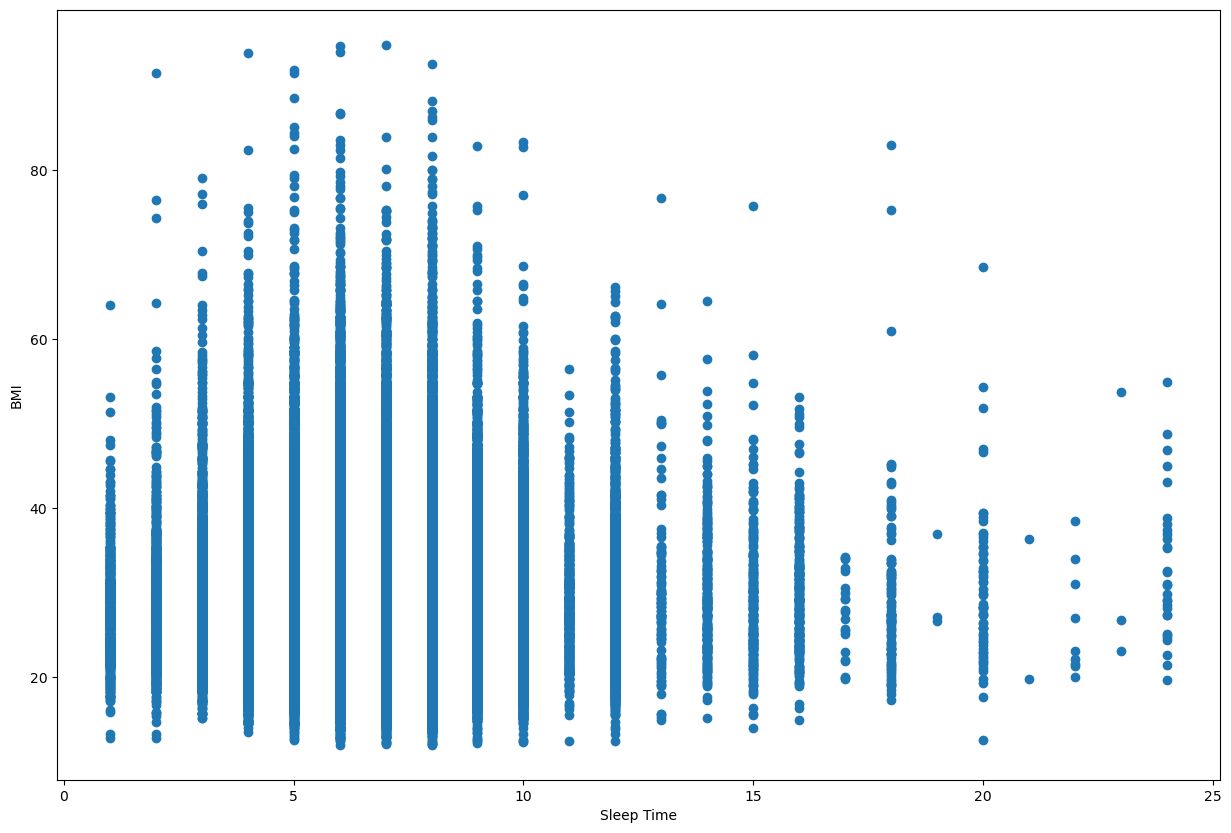

In [29]:
# df=df.sample(n=10000, replace=False)

fig, ax = plt.subplots(figsize=(15,10))

ax

ax.scatter(df["SleepTime"], df["BMI"],)
ax.set(
    xlabel="Sleep Time",
    ylabel="BMI"
);

### Approach 1: Balance target classes by reducing the majority class

In [30]:
df = pd.read_csv("heart_2020_cleaned.csv")

# Count all the rows
all_count = len(df)
print(f"All count: {all_count}")

# Count positive class (positive: has heart disease)
positive = df[df["HeartDisease"]=="Yes"]
positive_count = len(positive)
print(f"Positive count: {positive_count}")

# Count negative class (positive)
negative = df[df["HeartDisease"]=="No"]
negative_count = len(negative)
print(f"Negative count: {negative_count}")

# Reduce Majority class by taking a random sample equal to the minority class
negative_reduced = negative.sample(n=positive_count)
negative_reduced_count = len(negative_reduced)
print(f"Reduced negative count: {negative_reduced_count}")

# Create a balance dataframe
balanced_df = pd.concat([positive, negative_reduced])
balanced_df.head()
print(f"Final count: {len(balanced_df)}")


All count: 319795
Positive count: 27373
Negative count: 292422
Reduced negative count: 27373
Final count: 54746


In [31]:
# Plot target classes
# fig, ax = plt.subplots(figsize=(10, 10));
# ax.pie([positive_count, negatice_count]);

### Approach 2: Balance target classes by increasing the minority classes

In [32]:
# TODO: balance target classes by increasing the minority classes

df = pd.read_csv("heart_2020_cleaned.csv")

minority_class = df[df["HeartDisease"]=="Yes"]
majority_class = df[df["HeartDisease"]=="No"]

len(minority_class), len(majority_class)



(27373, 292422)

## Explore categorical columns

In [33]:
df = pd.read_csv("heart_2020_cleaned.csv")

### Explore AgeCategory Column

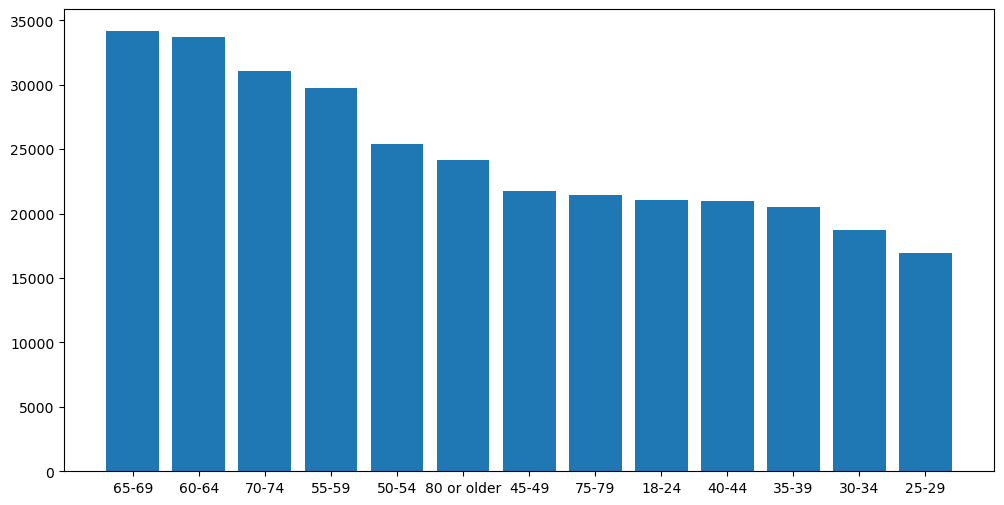

In [34]:
s = df["AgeCategory"].value_counts();
fig, ax = plt.subplots(figsize=(12,6));
ax.bar(x=s.index, height=s.values);

### Explore GenHealth

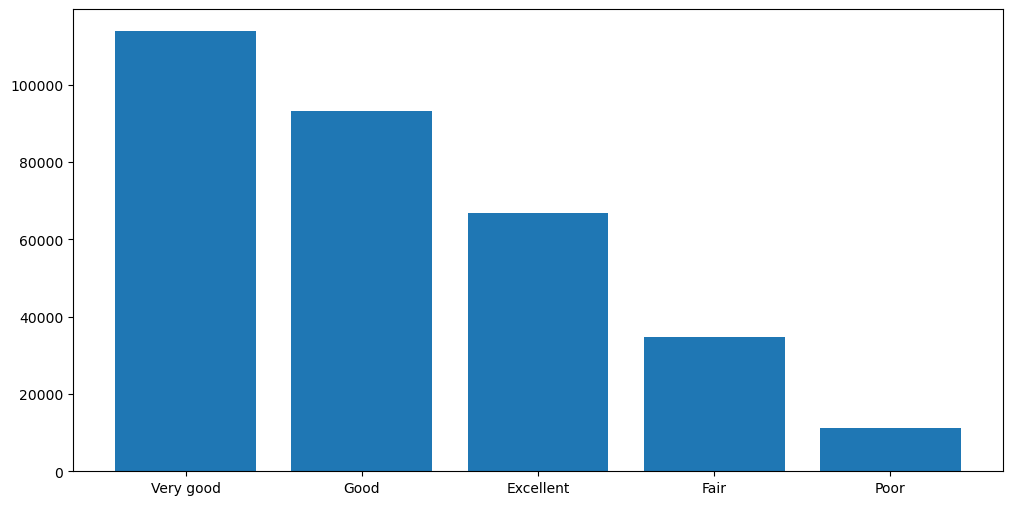

In [35]:
s = df["GenHealth"].value_counts();
fig, ax = plt.subplots(figsize=(12,6));
ax.bar(x=s.index, height=s.values);

### Explore Race column

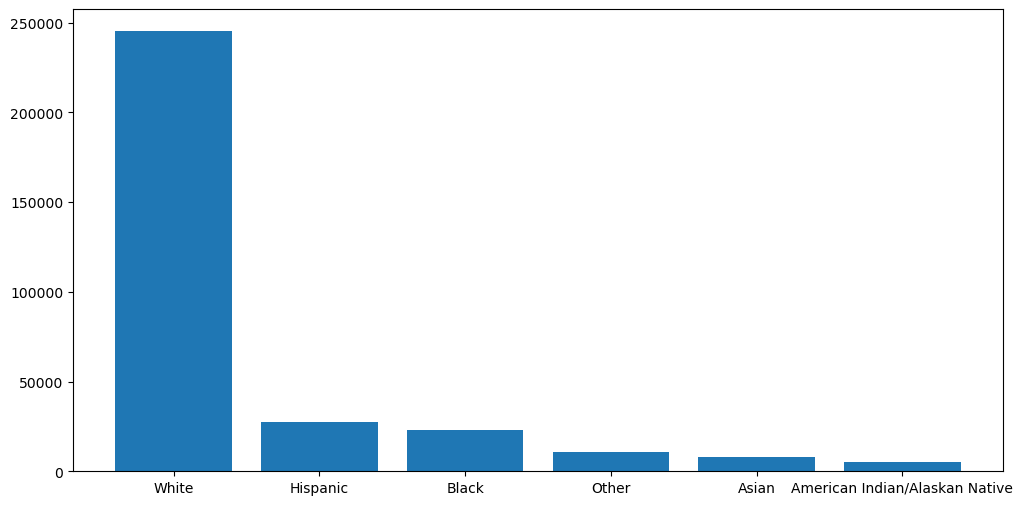

In [36]:
s = df["Race"].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=s.index, height=s.values);

### Explore Diabetic column

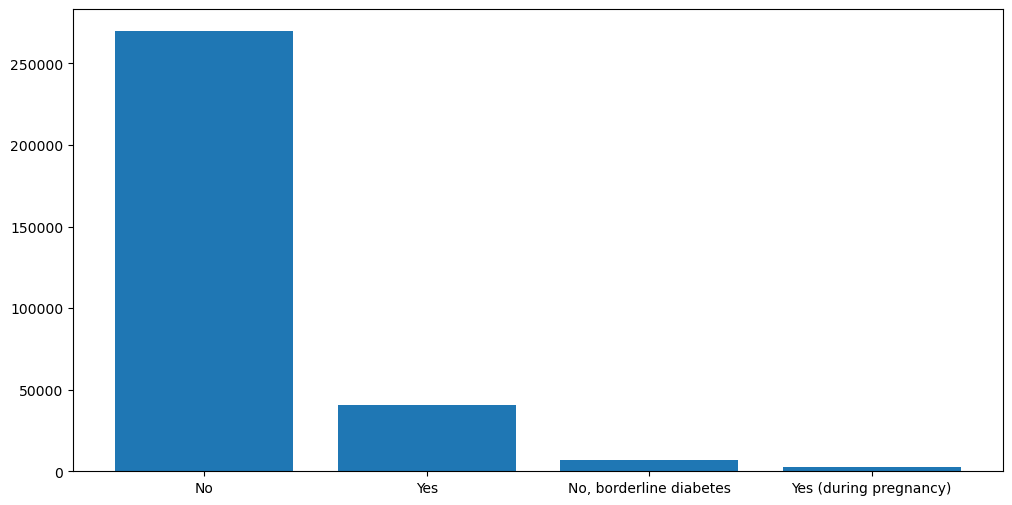

In [37]:
s = df["Diabetic"].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=s.index, height=s.values);

In [38]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Split data into features and labels

In [44]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

## Split data into training and test set

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Turn categorical features into numbers

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Diabetic', 'Race', 'GenHealth', 'AgeCategory']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

t_X = transformer.fit_transform(X)


# Split data into train and test sets with transformed categorical features
X_train, X_test, y_train, y_test = train_test_split(t_X, y, test_size=0.2)

df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.0,No,Male,Yes,8.0,No,No,No
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,No,0.0,30.0,Yes,Male,Yes,6.0,Yes,No,No
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,No,0.0,20.0,No,Male,Yes,6.0,No,No,No
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.0,No,Male,Yes,6.0,No,No,No
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,No,0.0,0.0,No,Male,Yes,6.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.0,No,Female,Yes,7.0,No,No,No
255832,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,2.0,7.0,No,Female,Yes,6.0,Yes,No,No
255833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.0,No,Female,Yes,7.0,No,No,No
255834,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Yes,30.0,12.0,Yes,Male,No,4.0,No,No,No
